In [2]:
using NCDatasets
using GRIBDatasets

In [2]:
###Note: Will break if you try to open the ds without filtering on a vertical level. 
###For HAFS data, the options are ["isobaricInhPa", "isobaricLayer", "meanSea", "heightAboveGroundLayer", "surface", "nominalTop", "tropopause"]

In [4]:
cf_path = "/Users/ischluesche/Documents/Grad_School/Research/julia_grib/cfgrib.jl/data/07l.2022091806.hfsb.storm.atm.f060.grb2"
ds =  GRIBDataset(cf_path, filter_by_values=Dict("typeOfLevel" => "isobaricInhPa"))
all_levels = ds["isobaricInhPa"][:]

45-element Vector{Int64}:
    2
    5
    7
   10
   20
   30
   50
   70
  100
  125
  150
  175
  200
    ⋮
  725
  750
  775
  800
  825
  850
  875
  900
  925
  950
  975
 1000

In [12]:
print(ds["isobaricInhPa"][:])

[2, 5, 7, 10, 20, 30, 50, 70, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000]

In [27]:
grib_path = "/Users/ischluesche/Documents/Grad_School/Research/julia_grib/cfgrib.jl/HAFS_DATA/07l.2022091806.hfsb.parent.atm.f012.grb2"

"/Users/ischluesche/Documents/Grad_School/Research/julia_grib/cfgrib.jl/HAFS_DATA/07l.2022091806.hfsb.parent.atm.f012.grb2"

In [29]:
ds = GRIBDataset(grib_path, filter_by_values=Dict("typeOfLevel" => "surface"))

Dataset: /Users/ischluesche/Documents/Grad_School/Research/julia_grib/cfgrib.jl/HAFS_DATA/07l.2022091806.hfsb.parent.atm.f012.grb2
Group: /

Dimensions
   lon = 1681
   lat = 1361
   valid_time = 1

Variables
  lon   (1681)
    Datatype:    Float64 (Float64)
    Dimensions:  lon
    Attributes:
     units                = degrees_east
     long_name            = longitude
     standard_name        = longitude

  lat   (1361)
    Datatype:    Float64 (Float64)
    Dimensions:  lat
    Attributes:
     units                = degrees_north
     long_name            = latitude
     standard_name        = latitude

  valid_time   (1)
    Datatype:    Dates.DateTime (Int64)
    Dimensions:  valid_time
    Attributes:
     units                = seconds since 1970-01-01T00:00:00
     calendar             = proleptic_gregorian
     long_name            = time
     standard_name        = time

  gust   (1681 × 1361 × 1)
    Datatype:    Union{Missing, Float64} (Float64)
    Dimensions:  lon × l

In [30]:
ds["ok"]

ErrorException: The key `ok` was not found in the dataset. Available keys: ["lon", "lat", "valid_time", "gust", "sp", "orog", "t", "mcpr", "prate", "tp", "acpcp", "ncpcp", "fsr", "fricv", "utaua", "vtaua", "ishf", "lhtfl", "sfexc", "cape", "cin", "dswrf", "dlwrf", "uswrf", "ulwrf", "unknown", "nlat", "elon", "lsm", "sst"]

In [38]:
levs = ds["isobaricInhPa"][:]
lats =ds["lat"][:]
lons = ds["lon"][:]
lonmesh = (ones(length(lats)))' .* lons
latmesh = lats' .* (ones(length(lons)))

1001×801 Matrix{Float64}:
 14.827  14.847  14.867  14.887  14.907  …  30.7662  30.7862  30.8062  30.827
 14.827  14.847  14.867  14.887  14.907     30.7662  30.7862  30.8062  30.827
 14.827  14.847  14.867  14.887  14.907     30.7662  30.7862  30.8062  30.827
 14.827  14.847  14.867  14.887  14.907     30.7662  30.7862  30.8062  30.827
 14.827  14.847  14.867  14.887  14.907     30.7662  30.7862  30.8062  30.827
 14.827  14.847  14.867  14.887  14.907  …  30.7662  30.7862  30.8062  30.827
 14.827  14.847  14.867  14.887  14.907     30.7662  30.7862  30.8062  30.827
 14.827  14.847  14.867  14.887  14.907     30.7662  30.7862  30.8062  30.827
 14.827  14.847  14.867  14.887  14.907     30.7662  30.7862  30.8062  30.827
 14.827  14.847  14.867  14.887  14.907     30.7662  30.7862  30.8062  30.827
 14.827  14.847  14.867  14.887  14.907  …  30.7662  30.7862  30.8062  30.827
 14.827  14.847  14.867  14.887  14.907     30.7662  30.7862  30.8062  30.827
 14.827  14.847  14.867  14.887  14.90

In [55]:
ds["w"]

w (1001 × 801 × 45 × 1)
  Datatype:    Union{Missing, Float64} (Float64)
  Dimensions:  lon × lat × isobaricInhPa × valid_time
  Attributes:
   units                = Pa s**-1
   long_name            = Vertical velocity
   standard_name        = lagrangian_tendency_of_air_pressure


In [52]:
var = "w"
lev = 900
levs = ds["isobaricInhPa"][:]
lev_idxer = levs .== lev
@assert(sum(lev_idxer) != 0)

curr_lev = ds[var][:,:, lev_idxer,:]
missing_frac = sum(map(ismissing, curr_lev[:])) / length(curr_lev[:])
missing_idxer = .! map(ismissing, curr_lev)

1001×801×1×1 BitArray{4}:
[:, :, 1, 1] =
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0

In [65]:
curr_u = ds["u"][:,:, lev_idxer,1][:,:]
curr_v = ds["v"][:,:, lev_idxer,1][:,:]

wind_mag = map(sqrt, ((curr_u .^ 2) + (curr_v .^ 2)))


1001×801 Matrix{Union{Missing, Float64}}:
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  

In [70]:
p = contour(lons, lats, wind_mag', st = [:surface], 
            fill=true, xlabel="Longitude (Degrees W)", ylabel="Latitude (Degrees N)", xlim=(287, 291), ylim=(22, 24), title = "W (Pa s**-1)")


In [59]:
default(legend = false)
x = y = range(-5, 5, length = 40)
zs = zeros(0, 40)
n = 100
@gif for i in range(0, stop = 2π, length = n)
    f(x, y) = sin(x + 10sin(i)) + cos(y)

    # create a plot with 3 subplots and a custom layout
    l = @layout [a{0.7w} b; c{0.2h}]
    p = plot(x, y, f, st = [:surface, :contourf], layout = l)

    # induce a slight oscillating camera angle sweep, in degrees (azimuth, altitude)
    plot!(p[1], camera = (10 * (1 + cos(i)), 40))

    # add a tracking line
    fixed_x = zeros(40)
    z = map(f, fixed_x, y)
    plot!(p[1], fixed_x, y, z, line = (:black, 5, 0.2))
    vline!(p[2], [0], line = (:black, 5))

    # add to and show the tracked values over time
    global zs = vcat(zs, z')
    plot!(p[3], zs, alpha = 0.2, palette = cgrad(:blues).colors)
end

Output file #0 does not contain any stream


LoadError: failed process: Process(setenv(`[4m/Users/ischluesche/.julia/artifacts/bf37190b92ac2fc3dd5e7073ff7ec7bbfd10343f/bin/ffmpeg[24m [4m-v[24m [4m16[24m [4m-i[24m [4m/var/folders/8d/nm74387d25q_yszbyg7xlqn40000gn/T/jl_Pl33yo/%06d.png[24m [4m-vf[24m [4mpalettegen=stats_mode=full[24m [4m-y[24m [4m/var/folders/8d/nm74387d25q_yszbyg7xlqn40000gn/T/jl_Pl33yo/palette.bmp[24m`,["XPC_FLAGS=0x0", "LSCOLORS=Gxfxcxdxbxegedabagacad", "PATH=/Users/ischluesche/.julia/artifacts/a6b6a73123c51d64fc30aa1caf34364bacf0f8a5/bin:/Users/ischluesche/.julia/artifacts/3fe8e47e7750d32cfb194a7927fc1d886d1fdfaa/bin:/Users/ischluesche/.julia/artifacts/b53d3c68aa0812e5ae574464a3198d17d79ded1a/bin:/Users/ischluesche/.julia/artifacts/bb74171086b39a991ff3f12027bdf216d0fe9bd3/bin:/Users/ischluesche/.julia/artifacts/115f3a18328d7b88e31c9e3f095aeb12eb381710/bin:/Users/ischluesche/.julia/artifacts/8aeda74365ddd4a5b4b857356622b5c7612a3f2e/bin:/Users/ischluesche/.julia/artifacts/0db9c3f6cf936a0da49e2ba954ba3e10bed6ad72/bin:/Users/ischluesche/.julia/artifacts/1a7e22e66b523d9cb884cf85c3ec065b5fb3e5c3/bin:/Users/ischluesche/.julia/artifacts/96d38e8912b961f0710ed6b522d0e44d1e5dc16a/bin:/Users/ischluesche/.julia/artifacts/bf37190b92ac2fc3dd5e7073ff7ec7bbfd10343f/bin:/Applications/Julia-1.9.app/Contents/Resources/julia/bin:/Users/ischluesche/.juliaup/bin:/Users/ischluesche/miniconda3/bin:/Users/ischluesche/miniconda3/condabin:/opt/homebrew/opt/openssl@1.1/bin:/Users/ischluesche/.gem/ruby/3.1.3/bin:/Users/ischluesche/.rubies/ruby-3.1.3/lib/ruby/gems/3.1.0/bin:/Users/ischluesche/.rubies/ruby-3.1.3/bin:/Users/ischluesche/bin:/usr/local/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/go/bin:/usr/local/MacGPG2/bin:/opt/X11/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin", "ELECTRON_RUN_AS_NODE=1", "_CE_M=", "VSCODE_CODE_CACHE_PATH=/Users/ischluesche/Library/Application Support/Code/CachedData/441438abd1ac652551dbe4d408dfcec8a499b8bf", "XPC_SERVICE_NAME=0", "HOMEBREW_PREFIX=/opt/homebrew", "VSCODE_NLS_CONFIG={\"locale\":\"en-us\",\"availableLanguages\":{},\"_languagePackSupport\":true}", "CONDA_PYTHON_EXE=/Users/ischluesche/miniconda3/bin/python"  …  "_CE_CONDA=", "LINES=30", "CONDA_SHLVL=1", "ECCODES_SAMPLES_PATH=/Users/ischluesche/.julia/artifacts/75ae67c2c99b525ae3d6865d14247a14c3be5674/lib/../share/eccodes/samples", "CONDA_EXE=/Users/ischluesche/miniconda3/bin/conda", "HOME=/Users/ischluesche", "CONDA_ROOT=/Users/ischluesche/miniconda3", "LS_COLORS=di=1;36:ln=35:so=32:pi=33:ex=31:bd=34;46:cd=34;43:su=30;41:sg=30;46:tw=30;42:ow=30;43", "PYTHONIOENCODING=utf-8", "OPENBLAS_MAIN_FREE=1"]), ProcessExited(1)) [1]


In [8]:
plot(lonmesh, latmesh, curr_lev[:,:], st = [:contourf])

Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have

GKS: dlopen(/Users/ischluesche/.julia/artifacts/7abccdc1101cc2bf22dc55c7ec0d101f4fe13e15/lib/cairoplugin.so, 0x0001): Library not loaded: @rpath/libtiff.5.dylib
  Referenced from: <64CAA3CA-6B51-3929-87D6-2D25DFA6A7BF> /Users/ischluesche/.julia/artifacts/7abccdc1101cc2bf22dc55c7ec0d101f4fe13e15/lib/cairoplugin.so
  Reason: tried: '/Users/ischluesche/.julia/artifacts/7abccdc1101cc2bf22dc55c7ec0d101f4fe13e15/lib/./libtiff.5.dylib' (no such file), '/Users/ischluesche/.julia/artifacts/7abccdc1101cc2bf22dc55c7ec0d101f4fe13e15/lib/./libtiff.5.dylib' (no such file), '/workspace/destdir/lib/libtiff.5.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/workspace/destdir/lib/libtiff.5.dylib' (no such file), '/Users/ischluesche/.julia/artifacts/7abccdc1101cc2bf22dc55c7ec0d101f4fe13e15/lib/./libtiff.5.dylib' (no such file), '/Applications/Julia-1.9.app/Contents/Resources/julia/lib/libtiff.5.dylib' (no such file), '/usr/local/lib/libtiff.5.dylib' (no such file), '/usr/lib/libtiff.5.dylib' 

Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have

Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have

In [18]:
curr_lev[missing_idxer]

374773-element Vector{Union{Missing, Float64}}:
  0.17
  0.11
  0.09
  0.04
  0.04
  0.03
 -0.01
  0.02
  0.07
  0.1
  0.14
  0.14
  0.18
  ⋮
 -0.19
 -0.18
 -0.18
 -0.15
 -0.08
  0.04
  0.17
  0.28
  0.35000000000000003
  0.36
  0.34
  0.29

In [13]:
length(curr_lev[:])

801801

In [3]:
import Pkg; 
Pkg.add("GRIBDatasets")

   Resolving package versions...


LoadError: Unsatisfiable requirements detected for package [38;5;1mGRIB [b16dfd50][39m:
 [38;5;1mGRIB [b16dfd50][39m log:
 ├─possible versions are: [38;5;1m0.2.0-0.4.0[39m or uninstalled
 ├─restricted to versions [38;5;1m0.1-0.2[39m by [38;5;2mCfGRIB [b476ad61][39m, leaving only versions: [38;5;1m0.2.0[39m
 │ └─[38;5;2mCfGRIB [b476ad61][39m log:
 │   ├─possible versions are: [38;5;2m0.1.0[39m or uninstalled
 │   └─[38;5;2mCfGRIB [b476ad61][39m is fixed to version [38;5;2m0.1.0[39m
 └─restricted by compatibility requirements with [38;5;12mGRIBDatasets [82be9cdb][39m to versions: [38;5;1m0.3.0-0.4.0[39m — no versions left
   └─[38;5;12mGRIBDatasets [82be9cdb][39m log:
     ├─possible versions are: [38;5;12m0.1.0-0.4.0[39m or uninstalled
     └─restricted to versions [38;5;12m*[39m by an explicit requirement, leaving only versions: [38;5;12m0.1.0-0.4.0[39m

In [4]:
currset = DataSet(cf_path);

LoadError: MethodError: no method matching haskey(::GRIB.Message, ::String)
You may have intended to import Base.haskey

[0mClosest candidates are:
[0m  haskey([91m::CfGRIB.AxisArrayWrapper[39m, ::Any)
[0m[90m   @[39m [36mCfGRIB[39m [90m~/Documents/Grad_School/Research/julia_grib/cfgrib.jl/src/backends/[39m[90m[4maxisarrays.jl:36[24m[39m


In [71]:
using NCDatasets

[ Info: Precompiling NCDatasets [85f8d34a-cbdd-5861-8df4-14fed0d494ab]


In [98]:
dimensions = ds.dims


Dimensions
   lon = 1001
   lat = 801
   isobaricInhPa = 45
   valid_time = 1


In [100]:
typeof(dimensions)

Tuple{GRIBDatasets.MessageDimension{GRIBDatasets.RegularGrid}, GRIBDatasets.MessageDimension{GRIBDatasets.RegularGrid}, GRIBDatasets.IndexedDimension{GRIBDatasets.Vertical}, GRIBDatasets.IndexedDimension{GRIBDatasets.Other}}

In [84]:
desired_levels = [500, 700]


45-element Vector{Bool}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [39]:
ds["refc"]

refc (1001 × 801 × 1)
  Datatype:    Union{Missing, Float64} (Float64)
  Dimensions:  lon × lat × valid_time
  Attributes:
   units                = dB
   long_name            = Maximum/Composite radar reflectivity


In [30]:
ds["isobaricInhPa"].dim

LoadError: MethodError: no method matching CommonDataModel.Dimensions(::CommonDataModel.CFVariable{Int64, 1, GRIBDatasets.Variable{Int64, 1, Vector{Int64}, GRIBDataset{Float64, 4, Missing}}, Dict{String, Any}, NamedTuple{(:fillvalue, :missing_values, :scale_factor, :add_offset, :calendar, :time_origin, :time_factor, :maskingvalue), Tuple{Nothing, Tuple{}, Nothing, Nothing, Nothing, Nothing, Nothing, Missing}}})

[0mClosest candidates are:
[0m  CommonDataModel.Dimensions([91m::TDS[39m) where TDS<:CommonDataModel.AbstractDataset
[0m[90m   @[39m [35mCommonDataModel[39m [90m~/.julia/packages/CommonDataModel/G3moc/src/[39m[90m[4mtypes.jl:89[24m[39m


In [24]:
size(ds["u"])

(1001, 801, 45, 1)

In [40]:
rand_idxer = [rand(Bool) for i in 1:45]

45-element Vector{Bool}:
 0
 1
 0
 1
 0
 1
 0
 1
 1
 0
 0
 0
 0
 ⋮
 1
 1
 0
 1
 0
 1
 0
 0
 1
 0
 0
 0

In [45]:
final_arr[:,:, rand_idxer, :] .= missing

1001×801×18×1 view(::Array{Missing, 4}, :, :, [2, 4, 6, 8, 9, 14, 21, 24, 25, 28, 29, 31, 32, 34, 35, 37, 39, 42], :) with eltype Missing:
[:, :, 1, 1] =
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  mi

In [47]:
final_arr = Array{Union{Missing, Float64}}(fill(missing, size(ds["u"])))
final_arr[:,:, rand_idxer, :] .= 24

1001×801×18×1 view(::Array{Union{Missing, Float64}, 4}, :, :, [2, 4, 6, 8, 9, 14, 21, 24, 25, 28, 29, 31, 32, 34, 35, 37, 39, 42], :) with eltype Union{Missing, Float64}:
[:, :, 1, 1] =
 24.0  24.0  24.0  24.0  24.0  24.0  …  24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0  …  24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0  …  24.0  24.0  24.0  24.0  

In [49]:
final_arr[:,:,2,:]

1001×801×1 Array{Union{Missing, Float64}, 3}:
[:, :, 1] =
 24.0  24.0  24.0  24.0  24.0  24.0  …  24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0  …  24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0  …  24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24.0  24.0  24.0  24.0  24.0  24.0
 24.0  24.0  24.0  24.0  24.0  24.0     24

In [104]:
using NCDatasets
using GRIBDatasets


##Write the fields out to a netcdf file 
###Important assumption here - variables are indexed as lat x lon x level x time 
###Some new modifications - can pass it a vector of vectors for level and a vector of level names 
function write_to_netcdf(outfile::String, input_set::String, fields::Vector{String}, field_levels::Vector{String}, levels::Vector)


    ds = GRIBDataset(input_set, filter_by_values=Dict("typeOfLevel" => field_levels[1]))

    ##This is gridded data so we'll assume that we will always be on the same lat/lon grid 
    lat = ds["lat"][:]
    lon = ds["lon"][:]
    t = ds["valid_time"][:]
    ###If output file already exists, remove it such that we might overwrite it 
    isfile(outfile) ? rm(outfile) : ""

    ###Do some dimension definitions 
    output = Dataset(outfile, "c")
    defDim(output, "time", length(t))
    defVar(output, "time", t, ("time", ))
    defDim(output, "lat", length(lat))
    defVar(output, "lat", lat, ("lat",))
    defDim(output, "lon", length(lon))
    defVar(output, "lon", lon, ("lon", ))


    ###There will be different types of levels 
    for levtype in Set(field_levels)

        if levtype == "atmosphereSingleLayer"
            continue 
        end 

        ds = GRIBDataset(input_set, filter_by_values=Dict("typeOfLevel" => levtype))
        currlevs = ds[levtype][:]
        defDim(output, levtype, length(currlevs))
        defVar(output, levtype, currlevs, (levtype,))
    end 

    ###Grab the data for each individual field, replacing the levels that they're not defined on with arrays of missings 
    for (i, field) in enumerate(fields)

        ds = GRIBDataset(input_set, filter_by_values=Dict("typeOfLevel" => field_levels[i]))

        if field_levels[i] == "atmosphereSingleLayer"

            currv = ds[field][:,:,:]
            defVar(output, String(field), currv, ("lon", "lat", "time"))

        else 
            
            curr_levels = ds[field_levels[i]][:]
            if typeof(levels[1]) != Colon
                lev_idxer = [lev in levels[i] for lev in curr_levels]
            else 
                lev_idxer = [true for lev in curr_levels]
            end 
        
            t = ds["valid_time"]

            cf = ds[field]

            final_arr = Array{Union{Missing, Float64}}(fill(missing, size(cf)))
            final_arr[:,:, lev_idxer, :] .= cf[:, :, lev_idxer, :]
            defVar(output, String(field), final_arr, ("lon", "lat", field_levels[i], "time"), attrib = cf.attrib)

        end 

        close(ds)
    end 
    
    close(output)
end 


field_levels = [:, :]
fields = ["u", "refc"]
level_names = ["isobaricInhPa", "atmosphereSingleLayer"]
outfile = "test_v2_out.nc"
infile = "./HAFS_DATA/07l.2022091806.hfsb.parent.atm.f012.grb2"

write_to_netcdf(outfile, infile, fields, level_names, field_levels)

write_to_netcdf (generic function with 2 methods)

In [105]:
field_levels = [:, :]
fields = ["u", "refc"]
level_names = ["isobaricInhPa", "atmosphereSingleLayer"]
outfile = "test_v2_out.nc"
infile = "./HAFS_DATA/07l.2022091806.hfsb.parent.atm.f012.grb2"

"./HAFS_DATA/07l.2022091806.hfsb.parent.atm.f012.grb2"

In [109]:
currs = GRIBDataset(infile, filter_by_values=Dict("typeOfLevel" => "atmosphereSingleLayer"))

Dataset: ./HAFS_DATA/07l.2022091806.hfsb.parent.atm.f012.grb2
Group: /

Dimensions
   lon = 1681
   lat = 1361
   valid_time = 1

Variables
  lon   (1681)
    Datatype:    Float64 (Float64)
    Dimensions:  lon
    Attributes:
     units                = degrees_east
     long_name            = longitude
     standard_name        = longitude

  lat   (1361)
    Datatype:    Float64 (Float64)
    Dimensions:  lat
    Attributes:
     units                = degrees_north
     long_name            = latitude
     standard_name        = latitude

  valid_time   (1)
    Datatype:    Dates.DateTime (Int64)
    Dimensions:  valid_time
    Attributes:
     units                = seconds since 1970-01-01T00:00:00
     calendar             = proleptic_gregorian
     long_name            = time
     standard_name        = time

  refc   (1681 × 1361 × 1)
    Datatype:    Union{Missing, Float64} (Float64)
    Dimensions:  lon × lat × valid_time
    Attributes:
     units                = dB
     l

In [110]:
currs["refc"]

refc (1681 × 1361 × 1)
  Datatype:    Union{Missing, Float64} (Float64)
  Dimensions:  lon × lat × valid_time
  Attributes:
   units                = dB
   long_name            = Maximum/Composite radar reflectivity


In [103]:
OrderedDict(currs["refc"].attrib)

LoadError: UndefVarError: `OrderedDict` not defined

In [106]:
write_to_netcdf(outfile, infile, fields, level_names, field_levels)

closed Dataset

In [107]:
currs = Dataset(outfile)

Dataset: test_v2_out.nc
Group: /

Dimensions
   time = 1
   lat = 1361
   lon = 1681
   isobaricInhPa = 45

Variables
  time   (1)
    Datatype:    Dates.DateTime (Float64)
    Dimensions:  time
    Attributes:
     units                = days since 1900-01-01 00:00:00

  lat   (1361)
    Datatype:    Float64 (Float64)
    Dimensions:  lat

  lon   (1681)
    Datatype:    Float64 (Float64)
    Dimensions:  lon

  isobaricInhPa   (45)
    Datatype:    Int64 (Int64)
    Dimensions:  isobaricInhPa

  u   (1681 × 1361 × 45 × 1)
    Datatype:    Union{Missing, Float64} (Float64)
    Dimensions:  lon × lat × isobaricInhPa × time
    Attributes:
     units                = m s**-1
     long_name            = U component of wind
     standard_name        = eastward_wind
     _FillValue           = 9.969209968386869e36

  refc   (1681 × 1361 × 1)
    Datatype:    Union{Missing, Float64} (Float64)
    Dimensions:  lon × lat × time
    Attributes:
     _FillValue           = 9.969209968386869e36


In [50]:
write_to_netcdf("hafs_data_out.nc", ["u", "v", "w", "refc"], Vector{Float64}(all_levels),"./HAFS_DATA/07l.2022091806.hfsb.parent.atm.f012.grb2" , "isobaricInhPa")


In [8]:
file_pref = "07l.2022091806.hfsb.parentF"
file_post = ".nc"
for file in readdir(data_dir)
    output_filename = file_pref * file * file_post 
    path = data_dir * "/" * file
    write_to_netcdf(output_filename, ["u", "v", "w"], Vector{Float64}(all_levels), path, "isobaricInhPa")
end

000
001


In [94]:
fhour_list = []
for fhour in (0:1:60)
    curr_fhour = lpad(fhour, 3, "0")
    print(curr_fhour)
    push!(fhour_list, curr_fhour)
end

In [95]:
fhour_list

61-element Vector{Any}:
 "000"
 "001"
 "002"
 "003"
 "004"
 "005"
 "006"
 "007"
 "008"
 "009"
 ⋮
 "052"
 "053"
 "054"
 "055"
 "056"
 "057"
 "058"
 "059"
 "060"

In [87]:
all_levels = ds["isobaricInhPa"][:]
write_to_netcdf("testout.nc", ["u", "v", "w"], Vector{Float64}(all_levels), cf_path, "isobaricInhPa")


In [66]:
lat = ds["lat"][:]
lon = ds["lon"][:]
curr_levels = ds["isobaricInhPa"][:]
t = ds["valid_time"]
isfile("test.out") ? rm("test.out") : 
outset = Dataset("test.out", "c")
output=outset

Dataset: test.out
Group: /



In [67]:
defDim(outset, "time", length(ds["valid_time"][:]))
defVar(outset, "time", ds["valid_time"][:], ("time",))
defDim(output, "level", length(curr_levels))
defVar(output, "level", curr_levels, ("level",))
defDim(output, "lat", length(lat))
defVar(output, "lat", lat, ("lat",))
defDim(output, "lon", length(lon))
defVar(output, "lon", lon, ("lon", ))

lon (1001)
  Datatype:    Float64 (Float64)
  Dimensions:  lon


In [73]:
defVar(func_output, "u", u, ("lon", "lat", "level", "time"))

u (1001 × 801 × 45 × 1)
  Datatype:    Union{Missing, Float64} (Float64)
  Dimensions:  lon × lat × level × time
  Attributes:
   _FillValue           = 9.969209968386869e36


In [38]:
output["u"][:,:,:,:]

1001×801×45×1 Array{Union{Missing, Float64}, 4}:
[:, :, 1, 1] =
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 ⋮                                   ⋱                             ⋮
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     mi

In [27]:
u = ds["u"][:,:,:,:][:,:,:,:]

1001×801×45×1 Array{Union{Missing, Float64}, 4}:
[:, :, 1, 1] =
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 ⋮                                   ⋱                             ⋮
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     mi

In [33]:
Array{Union{Float64, Missing}}(u)

1001×801×45×1 Array{Union{Missing, Float64}, 4}:
[:, :, 1, 1] =
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 ⋮                                   ⋱                             ⋮
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     mi

MethodError: MethodError: no method matching defVar(::String, ::String, ::Array{Union{Missing, Float64}, 4}, ::NTuple{4, String})

Closest candidates are:
  defVar(!Matched::CommonDataModel.AbstractDataset, ::Union{AbstractString, Symbol}, ::AbstractArray{T, N}, ::Any; kwargs...) where {T, N}
   @ CommonDataModel ~/.julia/packages/CommonDataModel/G3moc/src/variable.jl:94
  defVar(!Matched::CommonDataModel.AbstractDataset, ::Union{AbstractString, Symbol}, ::Any, ::Any; kwargs...)
   @ CommonDataModel ~/.julia/packages/CommonDataModel/G3moc/src/variable.jl:108
  defVar(!Matched::CommonDataModel.MemoryDataset, ::Union{AbstractString, Symbol}, !Matched::DataType, ::Any; fillvalue, attrib)
   @ CommonDataModel ~/.julia/packages/CommonDataModel/G3moc/src/memory_dataset.jl:133
  ...


In [ ]:

        ###Define the dimensions for the output dataset 
        defDim(input_set, "time", 1)
        defVar(input_set, "time", time(), ("time",))
        defDim(input_set, "x", length(x1))
        defVar(input_set, "x", x1, ("x", ))
        defDim(input_set, "y", length(y1))
        defVar(input_set, "y", y1, ("y", ))
        defDim(input_set, "altitude", length(z1))
        defVar(input_set, "altitude", z1, ("altitude",))
        ###Dimensions and shape of gridded fields 
        dimtuple = ("x", "y", "z", "time")
        shapetuple = (length(x1),length(y1),length(z1),1)
        ##Write out fields 
        defVar(input_set, "U", reshape(u[i_min:i_max,j_min:j_max,:], shapetuple), dimtuple)
        defVar(input_set, "V", reshape(v[i_min:i_max,j_min:j_max,:], shapetuple), dimtuple)
        defVar(input_set, "W", reshape(w[i_min:i_max,j_min:j_max,:], shapetuple), dimtuple)
        defVar(input_set, "VORT", reshape(vort[i_min:i_max,j_min:j_max,:],shapetuple) dimtuple)
        defVar(input_set, "DIV", reshape(div[i_min:i_max, j_min:j_max,:], shapetuple), dimtuple)
        defVar(input_set, "PI", reshape(b_pi[i_min:i_max,j_min:j_max,:], shapetuple), dimtuple)
        defVar(input_set, "THETARHO", reshape(b_thetarho[i_min:i_max,j_min:j_max,:], shapetuple), dimtuple)
        defVar(input_set, "PIP", reshape(b_pi_prime[i_min:i_max,j_min:j_max,:],shapetuple), dimtuple)
        defVar(input_set, "THETARHOP", reshape(b_thetarho_prime[i_min:i_max,j_min:j_max,:], shapetuple), dimtuple)
    
    end

In [92]:
write_to_netcdf("ok", ["u", "v"], [500., 700.], cf_path, "isobaricInhPa")

In [4]:
fac = 2.46*(10^10)

ppbvs = [1750, 0.018, .024, 50, 200, 500]
concs = fac .* ppbvs

6-element Vector{Float64}:
 4.305e13
 4.4279999999999994e8
 5.904e8
 1.23e12
 4.92e12
 1.23e13

In [5]:
concs

6-element Vector{Float64}:
 4.305e13
 4.4279999999999994e8
 5.904e8
 1.23e12
 4.92e12
 1.23e13

In [6]:
24 * fac

5.904e11

In [7]:
18 * fac

4.428e11

In [32]:
##Add code to alias HAFS data 
 
##Open HAFS nc file and grab pressure levels 
hafs_ds = Dataset("hafs_data_out.nc")
hafs_levs = hafs_ds["level"][:]

lev_of_interest = 850 
lev_idxer = hafs_levs .== lev_of_interest

lats = hafs_ds["lat"][:]
lons = hafs_ds["lon"][:]

1681-element Vector{Float64}:
 241.599998
 241.65999800238095
 241.7199980047619
 241.77999800714284
 241.83999800952378
 241.89999801190473
 241.95999801428567
 242.01999801666662
 242.07999801904757
 242.1399980214285
 242.19999802380946
 242.2599980261904
 242.31999802857135
   ⋮
 341.7400019737984
 341.8000019761794
 341.8600019785603
 341.92000198094127
 341.9800019833222
 342.04000198570316
 342.1000019880841
 342.16000199046505
 342.220001992846
 342.28000199522694
 342.3400019976079
 342.400002

In [7]:
u_lev = hafs_ds["u"][:,:,lev_idxer,:]

1681×1361×1×1 Array{Union{Missing, Float64}, 4}:
[:, :, 1, 1] =
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing 

In [8]:
###How do we fold. First need to determine how many times the nyquist frequency the velocity is. If it's <=1, don't need to do anything. 
###Odd intervals will constitute a fold. For example -> 
###1x nyquist frequency with remainder of n will fold to negative nyquist + remainder. 
###2x nyquist frequency with remainder of n will fold to negative nyquist + nyquist + remainder. 
###3x nyquist frequency with remainder of n will fold to negative nyquist + remainder 

###More generally: 
###Need to think about the sign here. 
###ODD times nyquist freq = (Opposite sign(v) * nyquist) + (sign(v) * remainder)
###EVEN times nyquist freq = (opposite sign(v) * nyquist) + (sign(v) * (nyquist + remainder))

###From APEX field program report -  Actual velocities measured by the TDR are folded/aliased within the Nyquist interval, 
####which is approximately -22 to 22 m/s for the standard 2775 Hz PRF used during HRD missions.
nyquist_freq = 22

###Calculate the number of folds for each gate in the wind field. 
function calc_folded(v, nyquist = nyquist_freq)

    if ismissing(v)
        return(missing)
    end 
    if abs(v) <= nyquist_freq
        return v
    else 
        ##Folded 
        rem = abs(v) % nyquist 
        vsign = sign(v) 
        ###Even number of folds 
        if ((v ÷ nyquist_freq) % 2) == 0
            v_folded = (-1 * vsign * nyquist) + (vsign * (rem + nyquist))
            return(v_folded)
        else 
            ###Odd number of multiples of nyquist freq 
            v_folded = (-1 * vsign * nyquist) + (vsign * rem)
            return(v_folded)
        end 
    end 
end 

calc_folded (generic function with 2 methods)

In [22]:
folded = map(calc_folded, u_lev)[:,:]

1681×1361 Matrix{Union{Missing, Float64}}:
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing 

In [23]:
missing_idxer = map(ismissing, folded[:,:])

1681×1361 Matrix{Bool}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  

In [24]:
folded[missing_idxer] .= -32000

753482-element view(reshape(::Matrix{Union{Missing, Float64}}, 2287841), [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  2287832, 2287833, 2287834, 2287835, 2287836, 2287837, 2287838, 2287839, 2287840, 2287841]) with eltype Union{Missing, Float64}:
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
      ⋮
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0
 -32000.0

In [35]:
folded

1681×1361 Matrix{Union{Missing, Float64}}:
 -32000.0  -32000.0  -32000.0  -32000.0  …  -32000.0  -32000.0  -32000.0
 -32000.0  -32000.0  -32000.0  -32000.0     -32000.0  -32000.0  -32000.0
 -32000.0  -32000.0  -32000.0  -32000.0     -32000.0  -32000.0  -32000.0
 -32000.0  -32000.0  -32000.0  -32000.0     -32000.0  -32000.0  -32000.0
 -32000.0  -32000.0  -32000.0  -32000.0     -32000.0  -32000.0  -32000.0
 -32000.0  -32000.0  -32000.0  -32000.0  …  -32000.0  -32000.0  -32000.0
 -32000.0  -32000.0  -32000.0  -32000.0     -32000.0  -32000.0  -32000.0
 -32000.0  -32000.0  -32000.0  -32000.0     -32000.0  -32000.0  -32000.0
 -32000.0  -32000.0  -32000.0  -32000.0     -32000.0  -32000.0  -32000.0
 -32000.0  -32000.0  -32000.0  -32000.0     -32000.0  -32000.0  -32000.0
 -32000.0  -32000.0  -32000.0  -32000.0  …  -32000.0  -32000.0  -32000.0
 -32000.0  -32000.0  -32000.0  -32000.0     -32000.0  -32000.0  -32000.0
 -32000.0  -32000.0  -32000.0  -32000.0     -32000.0  -32000.0  -32000.0
      ⋮ 

In [34]:
heatmap(lons, lats, folded)

LoadError: AssertionError: dimx <= length(x) <= dimx + 1 && dimy <= length(y) <= dimy + 1

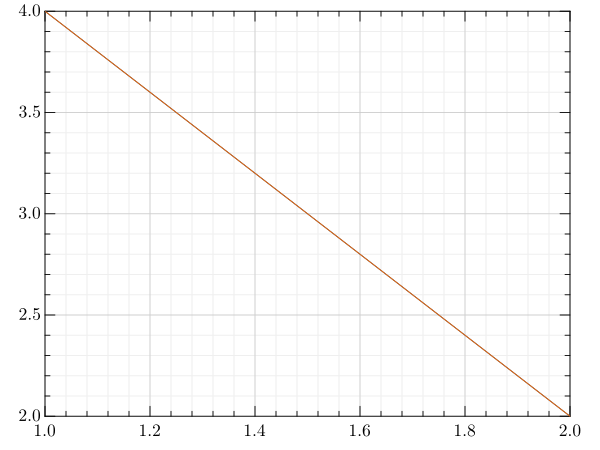

In [13]:
plot([4 4 ; 2 2])

In [21]:
sign(3)

1

In [5]:
hafs_ds["u"][:,:,:,:]

1681×1361×45×1 Array{Union{Missing, Float64}, 4}:
[:, :, 1, 1] =
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 ⋮                                   ⋱                             ⋮
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     m